# Лабораторная работа №1
*ПИН-212   
Кищенко Екатерина*

>Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)  
Отобразите временной ряд на графике  
Оцените его  
Сделайте начальные выводы  
Постройте 4 скользящие средние с окнами (5, 10, 30, 50)  
Оцените график с скоьзящими среднмии  
Сделайте предыдыдущие 2 пункта с экспоненциальными скользящими средними  
Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.  
Сделайте выводы по проделанной работе и опипшите их.  

                     Value
Date                      
2024-08-01 10:00:00  55.21
2024-08-01 10:05:00  54.93
2024-08-01 10:10:00  55.04
2024-08-01 10:15:00  54.93
2024-08-01 10:20:00  55.09
...                    ...
2024-09-30 23:25:00  54.24
2024-09-30 23:30:00  54.14
2024-09-30 23:35:00  54.08
2024-09-30 23:40:00  54.09
2024-09-30 23:45:00  54.05

[6995 rows x 1 columns]


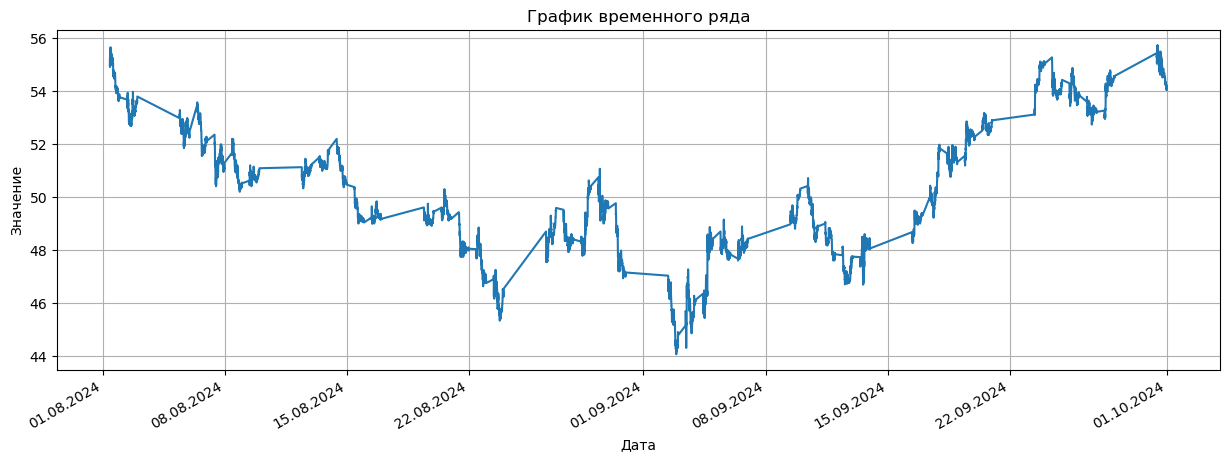

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv('AFLT.csv', delimiter=';', parse_dates=True)
data = data.rename(columns={'HIGH': 'Value'})
data['Date'] = data['DATE'] + ' ' + data['TIME']
data = data.drop(['DATE', 'TIME', 'TICKER', 'PER', 'OPEN', 'LOW', 'CLOSE', 'VOL'], axis=1)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y %H:%M:%S')
data.set_index('Date', inplace=True)
print(data)

# График временного ряда
plt.figure(figsize=(15, 5))
plt.plot(data.index, data["Value"])
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График временного ряда")

# Настройка отображения дат на оси X
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Отображать даты раз в день
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Формат даты: дд.мм.гггг

# Ограничить количество меток на оси X
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=15))

# Поворот меток для лучшей читаемости
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()


Низкая волатильность: цена изменяется плавно и стабильно, это может указывать на уверенность инвесторов в стабильности компании и на низкий риск для инвесторов.

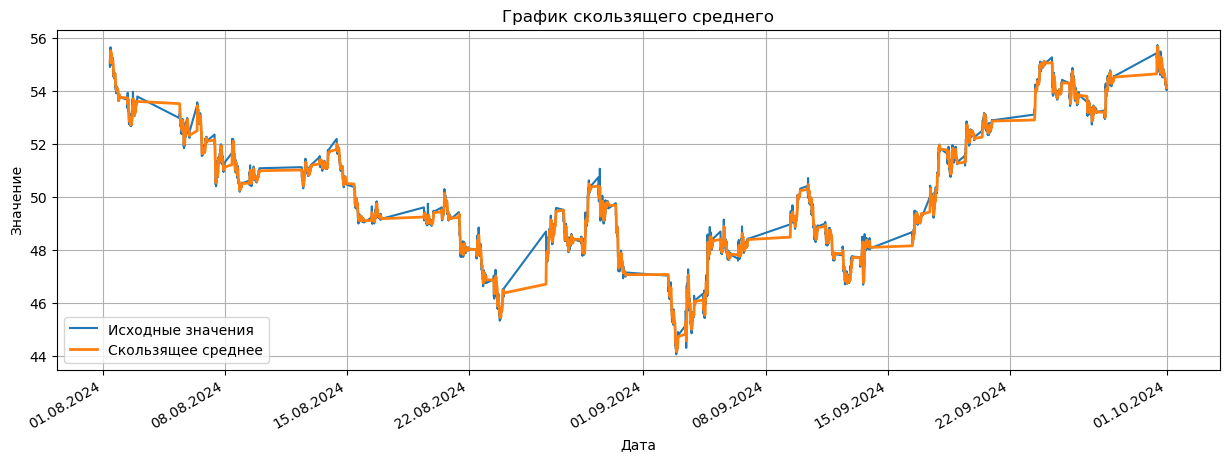

In [2]:
# График скользящего среднего
rolling_mean = data["Value"].rolling(window=7).mean()

plt.figure(figsize=(15, 5))
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean, label="Скользящее среднее", linewidth=2)

plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего")

# Настройка отображения дат на оси X
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Отображать даты раз в день
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Формат даты: дд.мм.гггг

# Ограничить количество меток на оси X
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=15))

# Поворот меток даты для лучшей читаемости
plt.gcf().autofmt_xdate()

plt.legend()
plt.grid(True)
plt.show()

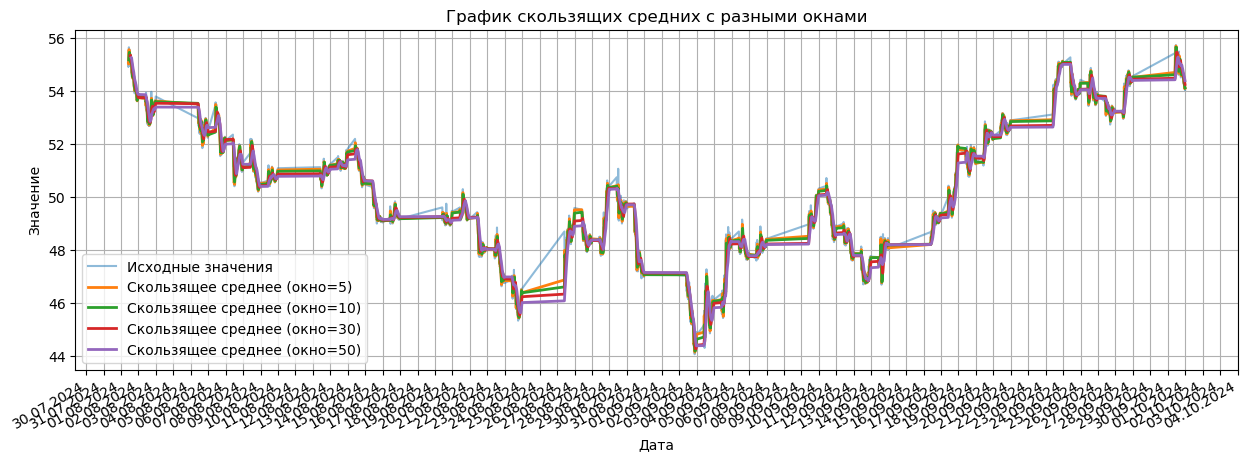

In [3]:
# Для создания графика в новом окне
#%matplotlib qt
%matplotlib inline
# Расчет скользящих средних
rolling_mean_5 = data["Value"].rolling(window=5).mean()
rolling_mean_10 = data["Value"].rolling(window=10).mean()
rolling_mean_30 = data["Value"].rolling(window=30).mean()
rolling_mean_50 = data["Value"].rolling(window=50).mean()

# Построение графика
plt.figure(figsize=(15, 5))
plt.plot(data.index, data["Value"], label="Исходные значения", alpha=0.5)
plt.plot(data.index, rolling_mean_5, label="Скользящее среднее (окно=5)", linewidth=2)
plt.plot(data.index, rolling_mean_10, label="Скользящее среднее (окно=10)", linewidth=2)
plt.plot(data.index, rolling_mean_30, label="Скользящее среднее (окно=30)", linewidth=2)
plt.plot(data.index, rolling_mean_50, label="Скользящее среднее (окно=50)", linewidth=2)

# Настройки графика
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящих средних с разными окнами")

# Настройка отображения дат на оси X
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Отображать метки раз в день
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Формат даты: дд.мм.гггг

# Поворот меток даты для лучшей читаемости
plt.gcf().autofmt_xdate()

plt.legend()
plt.grid(True)
plt.show()

5-дневное скользящее среднее пересекает 30-дневное сверху вниз 18.09.2024 — это может сигнализировать о начале медвежьего тренда (сигнал для продажи, падение).

Экспоненциальные скользящие средние более чувствительны к последним изменениям цен, чем простые скользящие средние, так как они придают больший вес более новым данным.

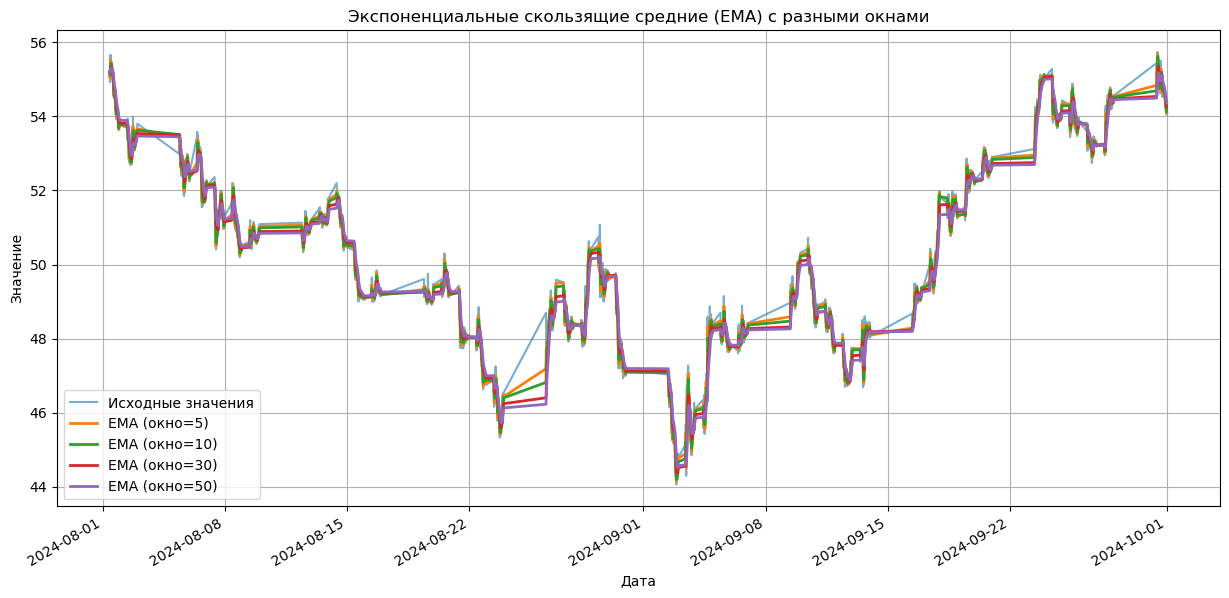

In [4]:
# Расчет экспоненциальных скользящих средних
ema_5 = data["Value"].ewm(span=5, adjust=False).mean()
ema_10 = data["Value"].ewm(span=10, adjust=False).mean()
ema_30 = data["Value"].ewm(span=30, adjust=False).mean()
ema_50 = data["Value"].ewm(span=50, adjust=False).mean()

# Построение графика
plt.figure(figsize=(15, 7))
plt.plot(data.index, data["Value"], label="Исходные значения", alpha=0.6)
plt.plot(data.index, ema_5, label="EMA (окно=5)", linewidth=2)
plt.plot(data.index, ema_10, label="EMA (окно=10)", linewidth=2)
plt.plot(data.index, ema_30, label="EMA (окно=30)", linewidth=2)
plt.plot(data.index, ema_50, label="EMA (окно=50)", linewidth=2)

# Настройка оформления графика
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Экспоненциальные скользящие средние (EMA) с разными окнами")
plt.legend()
plt.grid(True)

# Форматирование даты на оси X для лучшей читаемости
plt.gcf().autofmt_xdate()
plt.show()

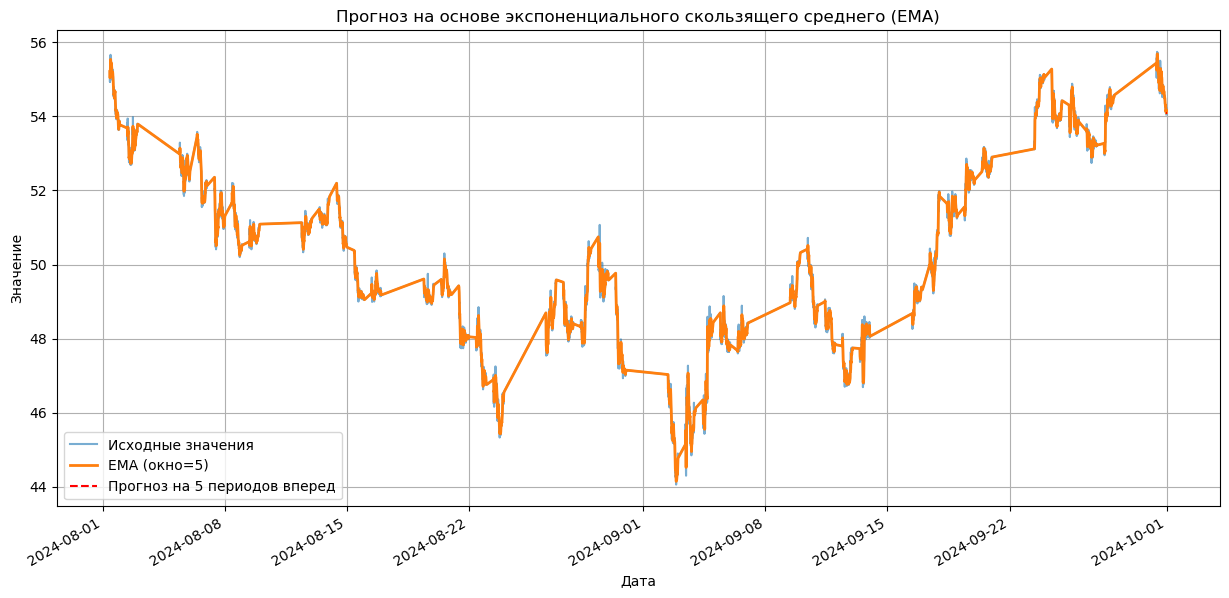

Прогноз на 5 периодов вперед:
2024-09-30 23:50:00    54.097851
2024-09-30 23:55:00    54.097851
2024-10-01 00:00:00    54.097851
2024-10-01 00:05:00    54.097851
2024-10-01 00:10:00    54.097851
Freq: 5T, dtype: float64


In [6]:
#%matplotlib qt
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Преобразование индекса в datetime (если это еще не сделано)
data.index = pd.to_datetime(data.index)

# Устанавливаем частоту временного ряда (например, каждые 5 минут)
data = data.asfreq('5T')

# Заполняем пропущенные значения, если они есть
data['Value'].interpolate(method='time', inplace=True)

# Расчет экспоненциального скользящего среднего (EMA) с окном 5
data['EMA_5'] = data['Value'].ewm(span=5, adjust=False).mean()

# Построение модели экспоненциального сглаживания на основе EMA
model = ExponentialSmoothing(data['EMA_5'], trend=None, seasonal=None, seasonal_periods=None)
fit = model.fit()

# Прогноз на 5 периодов вперед
forecast = fit.forecast(steps=5)

# Построение графика исходных данных, EMA и прогноза
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Value'], label='Исходные значения', alpha=0.6)
plt.plot(data.index, data['EMA_5'], label='EMA (окно=5)', linewidth=2)
plt.plot(forecast.index, forecast, label='Прогноз на 5 периодов вперед', linestyle='--', color='red')

# Настройка графика
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз на основе экспоненциального скользящего среднего (EMA)")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

# Вывод прогноза
print("Прогноз на 5 периодов вперед:")
print(forecast)